In [3]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


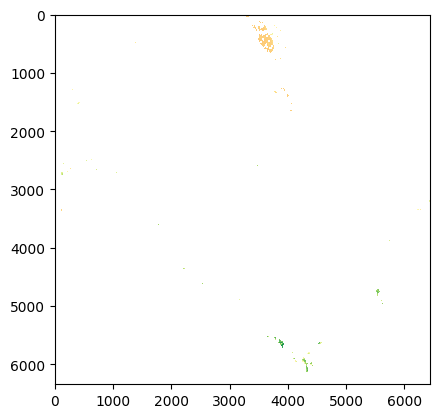

In [4]:
''' high vegetation = 21-14
    zero vegetation = 15_23
'''

sub_image2 = image_path = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\Array\\NDVI-test\\filtered_NDVI_RUH-B4-B8_2018-12-15.npy"
# Load the sub-image as a NumPy array
sub_image2 = np.load(sub_image2)

plt.imshow(sub_image2,cmap='RdYlGn')

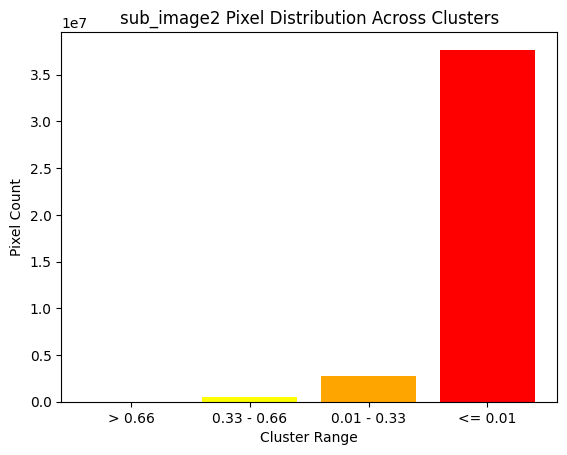

[13447, 464501, 2750728, 37664849]


In [5]:
cluster_counts = [0, 0, 0, 0]

# Loop over each pixel in the sub_image2 sub_image2
for row in range(sub_image2.shape[0]):  
    for col in range(sub_image2.shape[1]):  
        value = sub_image2[row, col]
        if value > 0.66:
            cluster_counts[0] += 1
        elif value > 0.33:
            cluster_counts[1] += 1
        elif value > 0.1331:
            cluster_counts[2] += 1
        else:
            cluster_counts[3] += 1

clusters = ['> 0.66', '0.33 - 0.66', '0.01 - 0.33', '<= 0.01']
plt.bar(clusters, cluster_counts, color=['green', 'yellow', 'orange', 'red'])
plt.title('sub_image2 Pixel Distribution Across Clusters')
plt.xlabel('Cluster Range')
plt.ylabel('Pixel Count')
plt.show()
print(cluster_counts)

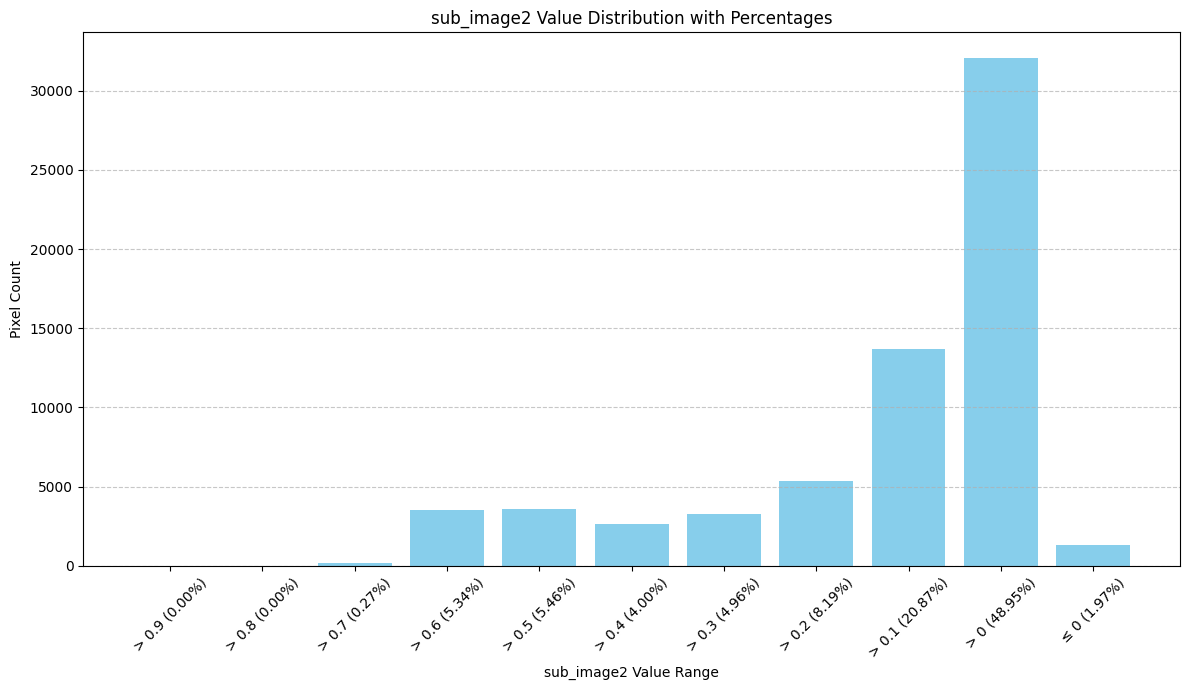

[0, 0, 179, 3502, 3576, 2620, 3248, 5366, 13680, 32077, 1288]


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming sub_image2 is a numpy array
total_pixels = np.prod(sub_image2.shape)  # Total number of pixels in the image

# Adjusted cluster counts to accommodate new classes
cluster_counts = [0] * 11  # 10 classes for 1-0.9, 0.89-0.8, ..., > 0, and one for ≤ 0

# Loop over each pixel in the sub_image2 array
for row in range(sub_image2.shape[0]):
    for col in range(sub_image2.shape[1]):
        value = sub_image2[row, col]
        # Classify each pixel and increment the corresponding class count
        if value > 0.9:
            cluster_counts[0] += 1
        elif value > 0.8:
            cluster_counts[1] += 1
        elif value > 0.7:
            cluster_counts[2] += 1
        elif value > 0.6:
            cluster_counts[3] += 1
        elif value > 0.5:
            cluster_counts[4] += 1
        elif value > 0.4:
            cluster_counts[5] += 1
        elif value > 0.3:
            cluster_counts[6] += 1
        elif value > 0.2:
            cluster_counts[7] += 1
        elif value > 0.1:
            cluster_counts[8] += 1
        elif value > 0:
            cluster_counts[9] += 1
        else:
            cluster_counts[10] += 1

# Calculate percentages for each class
cluster_percentages = [count / total_pixels * 100 for count in cluster_counts]

# Adjust cluster labels to include percentages
cluster_labels = [
    f'> 0.9 ({cluster_percentages[0]:.2f}%)', 
    f'> 0.8 ({cluster_percentages[1]:.2f}%)', 
    f'> 0.7 ({cluster_percentages[2]:.2f}%)', 
    f'> 0.6 ({cluster_percentages[3]:.2f}%)', 
    f'> 0.5 ({cluster_percentages[4]:.2f}%)', 
    f'> 0.4 ({cluster_percentages[5]:.2f}%)', 
    f'> 0.3 ({cluster_percentages[6]:.2f}%)', 
    f'> 0.2 ({cluster_percentages[7]:.2f}%)', 
    f'> 0.1 ({cluster_percentages[8]:.2f}%)', 
    f'> 0 ({cluster_percentages[9]:.2f}%)', 
    f'≤ 0 ({cluster_percentages[10]:.2f}%)'
]

plt.figure(figsize=(12, 7))
plt.bar(cluster_labels, cluster_counts, color='skyblue')
plt.title('sub_image2 Value Distribution with Percentages')
plt.xlabel('sub_image2 Value Range')
plt.ylabel('Pixel Count')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()
print(cluster_counts)


[29921, 35615]


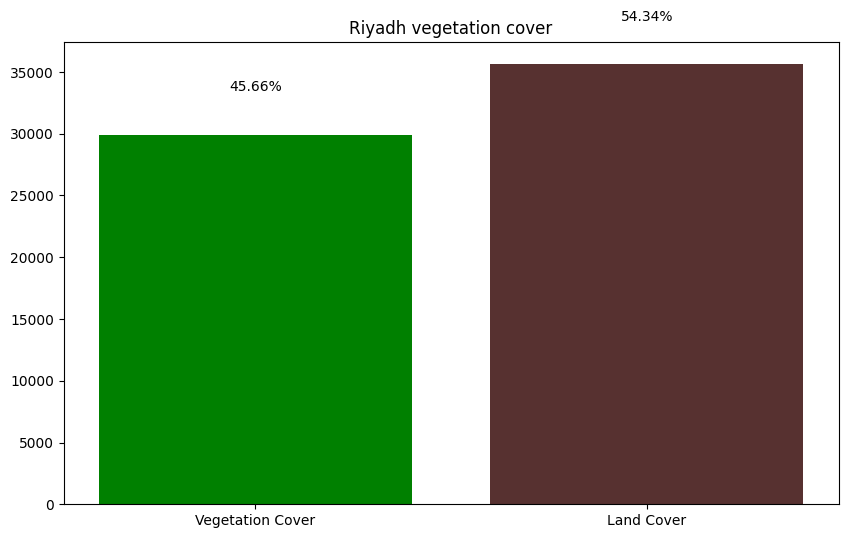

In [17]:
cluster_counts = [0, 0]

for row in range(sub_image2.shape[0]):  
    for col in range(sub_image2.shape[1]): 
        value = sub_image2[row, col]
        if value > 0.111:
            cluster_counts[0] += 1
        else:
            cluster_counts[1] += 1

print(cluster_counts)


total_count = sum(cluster_counts)

# Calculating percentages for each cluster
percentages = [count / total_count * 100 for count in cluster_counts]
cluster_labels = ['Vegetation Cover', 'Land Cover']
colors = ['green', '#573130']
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Riyadh vegetation cover')

# Adding percentage annotations on each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05 * total_count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()
